<a href="https://colab.research.google.com/github/gabriel-calazans/ATIVIDADE_FORM/blob/main/final_avalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [295]:
# Carregar o conjunto de dados de treinamento
train_data = pd.read_csv('dataset_risco_treino.csv')

In [296]:
train_data.head()

,ID,Idade,Peso,Altura,Pressao_Sistolica,Pressao_Diastolica,Nivel_Glicose,Tempo_Exercicio_Semanal,Consumo_Alcool_Semanal,Contagem_Globulos_Brancos,Contagem_Globulos_Vermelhos,Indice_Massa_Corporal,Nivel_Colesterol,Frequencia_Cardiaca,Nivel_Estresse,Horas_Sono_Dia,Risco
0,4228,66,64,157,109,70,110,11.859410,18,4737,5.068960,33.65,199,80,3,4.462193,1
1,4677,70,76,185,99,72,120,11.888231,0,10026,5.292232,34.00,230,99,3,5.381199,1
2,801,28,85,169,144,81,131,0.702209,5,10010,4.505430,27.46,193,80,4,4.250236,1
3,3672,66,72,168,122,67,76,8.632003,2,5401,5.397050,33.12,209,81,5,6.678473,1
4,4194,49,60,199,135,99,122,3.573211,10,6546,5.264416,33.78,192,72,9,4.118909,1


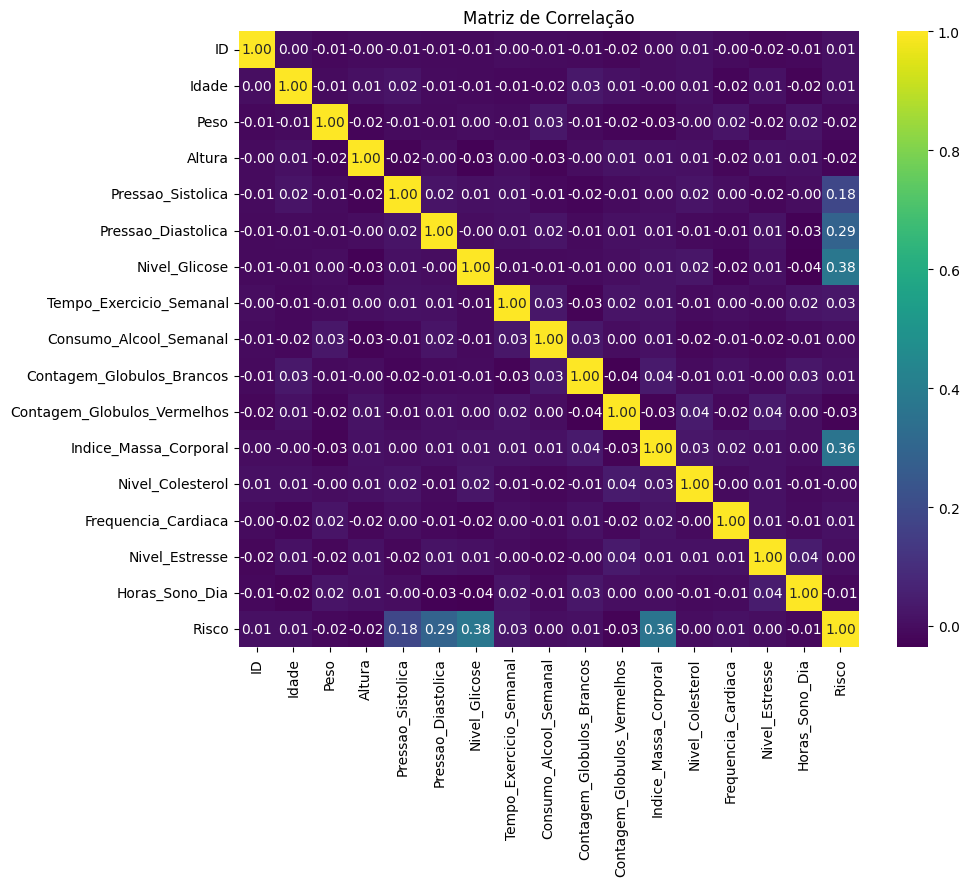

In [297]:
import seaborn as sns

# Carregue seu conjunto de dados
data = pd.read_csv('dataset_risco_treino.csv')

# Calcule a matriz de correlação
correlation_matrix = data.corr()

# Escolha um mapa de cores diferente, por exemplo, "viridis"
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



In [381]:
# Definir os nomes das colunas e da variável alvo de acordo com a descrição da avaliação
X1 = 'Idade'
X2 = 'Pressao_Sistolica'
X3 = 'Pressao_Diastolica'
X4 = 'Nivel_Glicose'
X5 = 'Indice_Massa_Corporal'
X6 = 'Contagem_Globulos_Vermelhos'
y = 'Risco'

# Separar as características (X) e a variável alvo (y)
X_train = train_data[[X1, X2, X3, X4, X5, X6]]
y_train = train_data[y]

In [382]:
# Inicializar e treinar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [383]:
# Carregar o conjunto de dados de teste
test_data = pd.read_csv('dataset_risco_teste.csv')

In [384]:
# Fazer previsões nos dados de teste
X_test = test_data[[X1, X2, X3, X4, X5, X6]]
y_pred = knn_model.predict(X_test)

In [385]:
# Calcular o F1-score com base nas previsões e no conjunto de treinamento
f1 = f1_score(y_train, knn_model.predict(X_train))

print(f'F1-score no conjunto de treinamento: {f1}')

F1-score no conjunto de treinamento: 0.9648127128263337


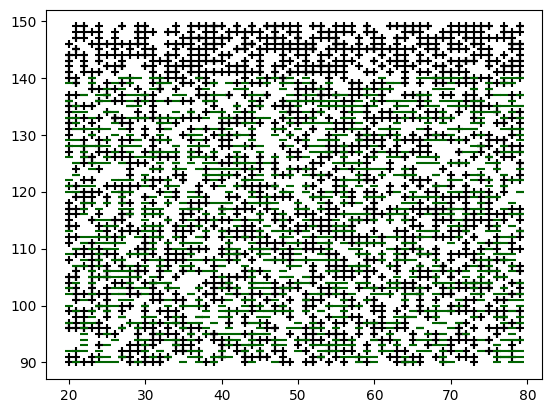

In [386]:
# Plotar gráfico com as previsões
plt.scatter(train_data[X1][y_train == 1], train_data[X2][y_train == 1], c='black', marker='+', label='Alto Risco')
plt.scatter(train_data[X1][y_train == 0], train_data[X2][y_train == 0], c='darkgreen', marker='_', label='Baixo Risco')


In [387]:
# Salvar as previsões em um arquivo CSV para submissão
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Target': y_pred})
submission_df.to_csv('submission.csv', index=False)